In [2]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from main import *

__author__ = kq

__date__ = 20240328

##### Motivation -- Factor Returns

Stock returns tend to be correlated. However, when factorizing these returns, either structurally or statistically (PCA), they follow very different distributions. It may be possible to create better uncertainty sets by having different Wasserstein distances for each. This has not been done in DRO yet, to the best of my knowledge. The idea is not limited to stock returns, as it can also be used for various other multi-crteria/objective problems in nature and in practice.

Some statistics below on 6 factors.

<IPython.core.display.Javascript object>


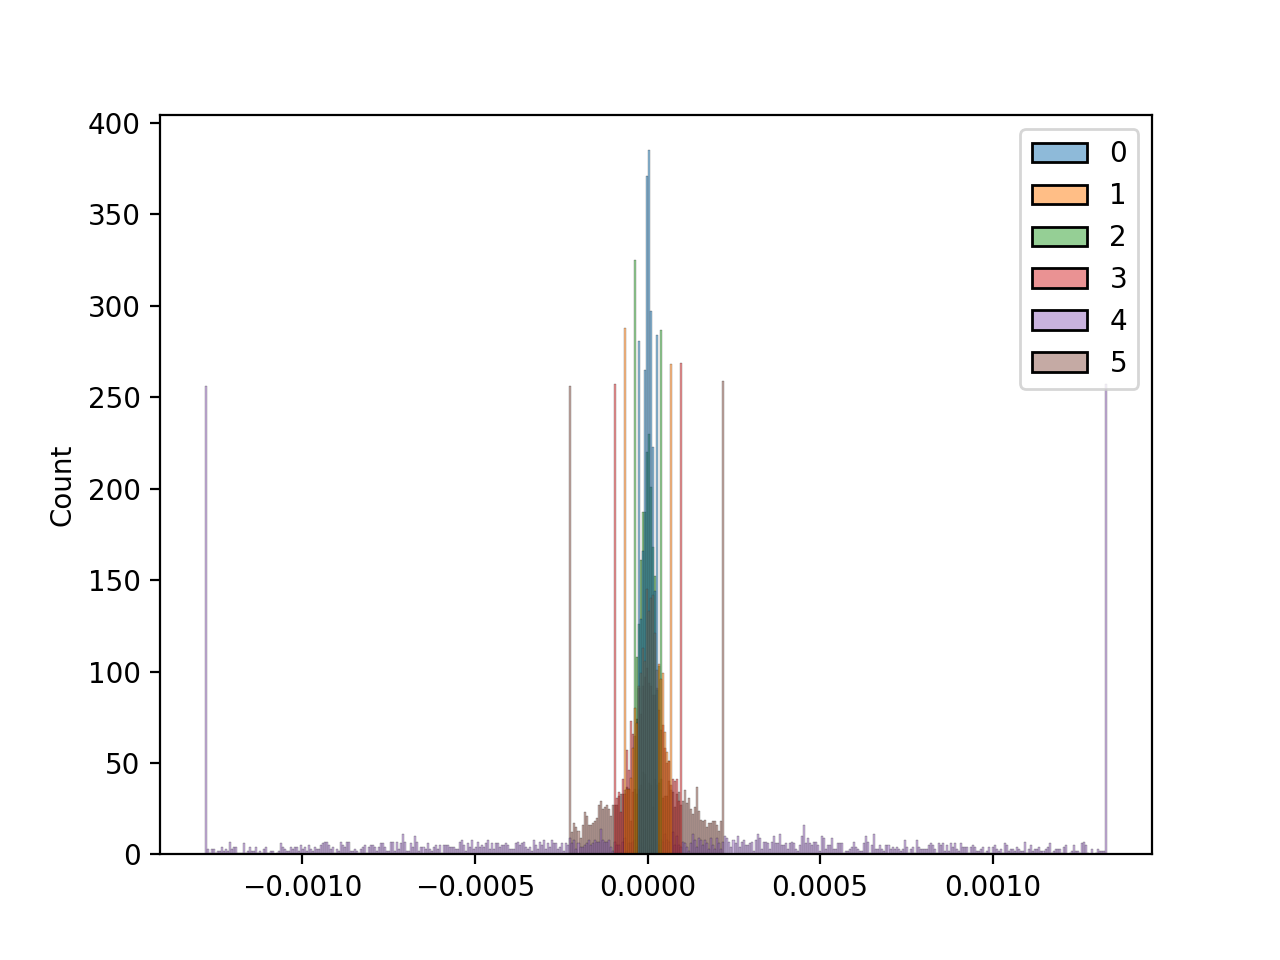

<AxesSubplot:ylabel='Count'>

,mu,sigma
0,0.000001,0.000037
1,0.000003,0.000311
2,-0.000000,0.000180
3,0.000002,0.000645
4,0.000018,0.009258
5,0.000001,0.002141


Factor Correlation


,0,1,2,3,4,5
0,1.000000e+00,5.300991e-15,-9.019497e-18,1.426808e-16,-1.262151e-16,3.604669e-16
1,5.300991e-15,1.000000e+00,-1.057679e-13,2.482979e-12,-1.131654e-11,-3.499869e-10
2,-9.019497e-18,-1.057679e-13,1.000000e+00,-2.208893e-11,7.474322e-11,2.172598e-09
3,1.426808e-16,2.482979e-12,-2.208893e-11,1.000000e+00,-1.874502e-09,-7.035660e-08
4,-1.262151e-16,-1.131654e-11,7.474322e-11,-1.874502e-09,1.000000e+00,2.137600e-07
5,3.604669e-16,-3.499869e-10,2.172598e-09,-7.035660e-08,2.137600e-07,1.000000e+00


##### Formulation

Suppose we have $m$ stocks over the span of $n$ trading days, and we wish to determine a risk-optimal portfolio, whose weights $x$ sum to 1.

Suppose we have factorized returns (via PCA), $\hat{\pmb{y}}_{jr}$, for which we have to have a constraint. Because the distributions of these factor returns are not the same, we can have a set of $\epsilon_r, r \in [R]$.

\begin{align}
\min ~& \sum_{r=1}^R \lambda_r \epsilon_r + \sum_{r=1}^R
\left[\frac{1}{n}\sum\limits_{i=1}^n s_{ir} \right] \\
\text{s.t.} ~&\sum\limits_{i=1}^m x_i = 1 & \\
&x_i \geq 0, &\forall i \in [m] \\
&b_k \tau + a_k \hat{\pmb{y}}_{jr}^{\top}\pmb{x} + \pmb{\gamma}_{jkr}^{\top}(\pmb{d} - \pmb{C}\hat{\pmb{y}}_{jr}) \leq s_{ir} &\forall j \in [n], \forall k \in [K], \forall r \in [R] \\
&\|\pmb{C}^{\top}\pmb{\gamma}_{jkr} - a_k\pmb{x}\|_{\infty} \leq \lambda_r & \forall r \in [R]\\
&\pmb{\gamma}_{jkr} \in \mathbb{R}_{+}^{m} & \forall j \in [n], \forall k \in [K], \forall r \in [R]
\end{align}

**Objective**: 

**Constraint 1**: Weights sum to 1

**Constraint 2**: Weights non-negative

**Constraint 3**: Uncertainty of factor returns following from a convex reduction (Theorem 4.2 of [this paper](https://arxiv.org/pdf/1505.05116.pdf#page=12)) 

**Constraint 4**: Dual norm bounded.

##### Fetch weights

In [4]:
weights = run(num_stocks=20, 
              num_days=60, 
              num_components=5)

Using $\epsilon$ = [0.0071295844770898195, 0.008177287694004049, 0.005710018249135276, 7.694215542022208e-05, 0.004547196039106853]$ for 5 components
Conic program object:
Number of variables:           3329
Continuous/binaries/integers:  3329/0/0
---------------------------------------------
Number of linear constraints:  25202
Inequalities/equalities:       25201/1
Number of coefficients:        98706
---------------------------------------------
Number of SOC constraints:     0
---------------------------------------------
Number of ExpCone constraints: 0
---------------------------------------------
Number of PSCone constraints:  0

Being solved by the default LP solver...
Solution status: 0
Running time: 0.2561s
Solver:          SciPy
Solution status: 0
Solution time:   0.2561s
-------------------------------------
Objective value: 0.14072660603895382
Primal solution: Available
Dual solution:   Available


In [5]:
weights

A       0.061893
AAL     0.035850
AAPL    0.061893
ABBV    0.061893
ABNB    0.061893
ABT     0.061893
ACGL    0.061893
ACN     0.061893
ADBE    0.000000
ADI     0.061893
ADM     0.061893
ADP     0.061893
ADSK    0.017262
AEE     0.061893
AEP     0.018489
AES     0.000000
AFL     0.061893
AIG     0.061893
AIZ     0.061893
AJG     0.061893
dtype: float64

##### Entropy ratio

In [13]:
m = 20
sum((weights * np.log(weights)).dropna()) / (m * (1 / m * np.log(1 / m)))

0.9501190654623692